##### 您将获得每日历史销售数据。任务是预测测试集在每个商店中出售的产品总数。请注意，商店和产品的清单每月都会略有变化。创建可以处理此类情况的可靠模型是挑战的一部分。


##### 档案说明：
##### sales_train.csv-训练集。2013年1月至2015年10月的每日历史数据。
##### test.csv-测试集。您需要预测这些商店和产品在2015年11月的销售额。
##### sample_submission.csv-格式正确的示例提交文件。
##### items.csv-有关项目/产品的补充信息。
##### item_categories.csv-   有关项目类别的补充信息。
##### shop.csv-有关商店的补充信息。


##### 资料栏位：
##### ID-  代表测试集中的（商店，商品）元组的ID
##### shop_id-商店的唯一标识符
##### item_id-产品的唯一标识符
##### item_category_id-项目类别的唯一标识符
##### item_cnt_day-销售的产品数量。您正在预测该指标的每月金额
##### item_price-商品的当前价格
##### 日期  -格式为dd / mm / yyyy的日期
##### date_block_num-连续的月份号，为方便起见。2013年1月为0,2013年2月为1，...，2015年10月为33
##### item_name-  项目名称
##### shop_name-商店名称
##### item_category_name-项目类别名称

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df_test = pd.read_csv('test.csv').copy()
df_train = pd.read_csv('sales_train.csv').copy()
items = pd.read_csv('items.csv').copy()
item_categories = pd.read_csv('item_categories.csv').copy()
shops = pd.read_csv('shops.csv').copy()
sample_submission = pd.read_csv('sample_submission.csv').copy()

In [4]:
df_train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
df_test.head(5)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
sample_submission.head(5)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [7]:
items.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
item_categories.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
item_categories['item_category_name'][item_categories['item_category_id']==40]

40    Кино - DVD
Name: item_category_name, dtype: object

In [10]:
shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [11]:
df_train.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [12]:
# sales_train_subset = df_train.copy()
# sales_train_subset.head()

# grouped = sales_train_subset[['shop_id','item_id','item_cnt_day']].groupby(['shop_id','item_id']).agg({'item_cnt_day':'sum'}).reset_index()
# grouped = grouped.rename(columns={'item_cnt_day' : 'item_cnt_month'})
# grouped.head()

# test = pd.merge(df_test,grouped, on = ['shop_id','item_id'], how = 'left')
# # print(test.head())
# test['item_cnt_month'] = test['item_cnt_month'].fillna(0).clip(0,20)
# # print(test.head())
# test = test[['ID','item_cnt_month']]

# 观察数据

In [52]:
sales_by_item_id = df_train.pivot_table(index=['item_id'],values=['item_cnt_day'], 
                                        columns='date_block_num', aggfunc=np.sum, fill_value=0).reset_index()
sales_by_item_id.columns = sales_by_item_id.columns.droplevel().map(str)
sales_by_item_id = sales_by_item_id.reset_index(drop=True).rename_axis(None, axis=1)
sales_by_item_id.columns.values[0] = 'item_id'

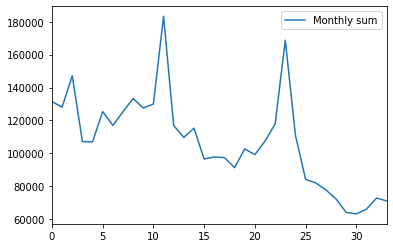

In [59]:
sales_by_item_id.sum()[1:].plot(legend=True, label="Monthly sum")   # legend 图例

In [97]:
outdated_items = sales_by_item_id[sales_by_item_id.loc[:,'27':].sum(axis=1)==0]
print('Outdated items:', len(outdated_items))
print('unique items in test set:', df_test['item_id'].nunique())
print('Outdated items in test set:', df_test[df_test['item_id'].isin(outdated_items['item_id'])]['item_id'].nunique())

Outdated items: 12391
unique items in test set: 5100
Outdated items in test set: 164


In [98]:
sales_by_shop_id = df_train.pivot_table(index=['shop_id'],values=['item_cnt_day'], 
                                        columns='date_block_num', aggfunc=np.sum, fill_value=0).reset_index()
sales_by_shop_id.columns = sales_by_shop_id.columns.droplevel().map(str)
sales_by_shop_id = sales_by_shop_id.reset_index(drop=True).rename_axis(None, axis=1)
sales_by_shop_id.columns.values[0] = 'shop_id'

for i in range(27,34):
    print('Not exists in month',i,sales_by_shop_id['shop_id'][sales_by_shop_id.loc[:,'0':str(i)].sum(axis=1)==0].unique())

for i in range(27,34):
    print('Shop is outdated for month',i,sales_by_shop_id['shop_id'][sales_by_shop_id.loc[:,str(i):].sum(axis=1)==0].unique())

Not exists in month 27 [36]
Not exists in month 28 [36]
Not exists in month 29 [36]
Not exists in month 30 [36]
Not exists in month 31 [36]
Not exists in month 32 [36]
Not exists in month 33 []
Shop is outdated for month 27 [ 0  1  8 11 13 17 23 30 32 40 43]
Shop is outdated for month 28 [ 0  1  8 11 13 17 23 30 32 33 40 43 54]
Shop is outdated for month 29 [ 0  1  8 11 13 17 23 29 30 32 33 40 43 54]
Shop is outdated for month 30 [ 0  1  8 11 13 17 23 29 30 32 33 40 43 54]
Shop is outdated for month 31 [ 0  1  8 11 13 17 23 29 30 32 33 40 43 54]
Shop is outdated for month 32 [ 0  1  8 11 13 17 23 29 30 32 33 40 43 54]
Shop is outdated for month 33 [ 0  1  8 11 13 17 23 27 29 30 32 33 40 43 51 54]


In [105]:
sales_by_shop_id

,shop_id,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,0,5578,6127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2947,3364,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1146,488,753,583,553,832,807,875,945,...,987,907,762,859,843,804,785,942,822,727
3,3,767,798,959,647,710,784,721,890,1026,...,977,738,741,740,731,672,535,666,745,613
4,4,2114,2025,2060,285,1211,1464,1378,1713,1536,...,1188,980,978,899,893,793,842,947,732,831
5,5,0,877,1355,1008,1110,1393,1265,1510,1298,...,1404,1101,1109,1054,1012,954,991,1294,1092,1052
6,6,3686,4007,4519,3168,3022,3847,3360,3702,4208,...,2328,2329,1981,1998,1748,1539,1484,1575,1725,1802
7,7,2495,2513,2460,1540,1647,2085,2031,2397,2599,...,2084,1847,1430,1340,1217,1235,1327,1409,1287,1212
8,8,1463,1156,977,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,3186


In [116]:
sales_by_shop_id['shop_id'][0]

0

In [113]:
sales_by_shop_id.loc[:,'0':str(2)].sum(axis=1)==0

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33     True
34     True
35    False
36     True
37    False
38    False
39     True
40     True
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48     True
49     True
50    False
51    False
52    False
53    False
54    False
55     True
56    False
57    False
58    False
59    False
dtype: bool